In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_score
from matplotlib.lines import Line2D

from sklearn.svm import SVC
from mpl_toolkits.mplot3d import Axes3D
from sklearn import svm

from sklearn.model_selection import StratifiedKFold, cross_val_score

In [2]:
data_new = pd.read_csv('Automobile_Final_2.csv')

In [3]:
print("Features:")
print(data_new.columns.tolist())

Features:
['name', 'mpg', 'cylinders', 'horsepower', 'model_year', 'origin']


Penjelasan entry dalam grafik

In [4]:
average_mpg_by_origin = data_new.groupby('origin')['mpg'].mean()

print(average_mpg_by_origin)

origin
europe    20.245073
japan     21.373236
usa       17.899788
Name: mpg, dtype: float64


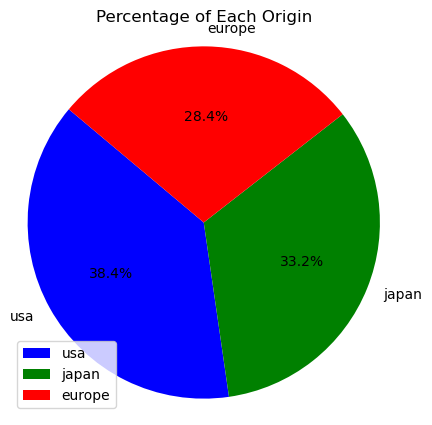

In [30]:
origin_percentage = data_new['origin'].value_counts(normalize=True) * 100

colors = {'usa': 'blue', 'japan': 'green', 'europe': 'red'}

plt.figure(figsize=(5, 5))
plt.pie(origin_percentage, labels=origin_percentage.index, autopct='%1.1f%%', startangle=140, colors=[colors[origin] for origin in origin_percentage.index])
plt.title('Percentage of Each Origin')
plt.axis('equal') 

plt.legend()
plt.show()

Average MPG by each origin value

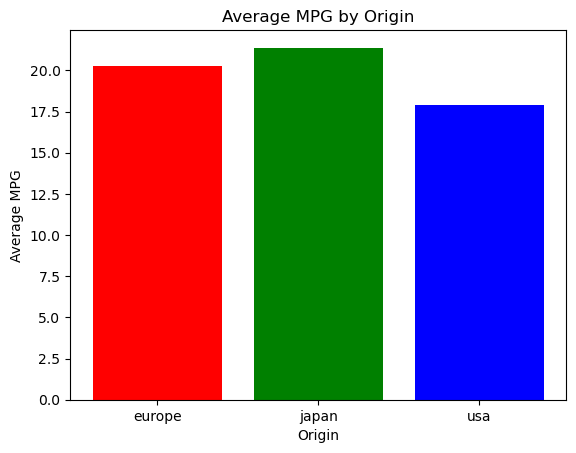

In [10]:
colors = {'usa': 'blue', 'japan': 'green', 'europe': 'red'}

plt.bar(average_mpg_by_origin.index, average_mpg_by_origin.values, color=[colors[origin] for origin in average_mpg_by_origin.index])

plt.xlabel('Origin')
plt.ylabel('Average MPG')
plt.title('Average MPG by Origin')

plt.show()

Distribusi nilai model_year

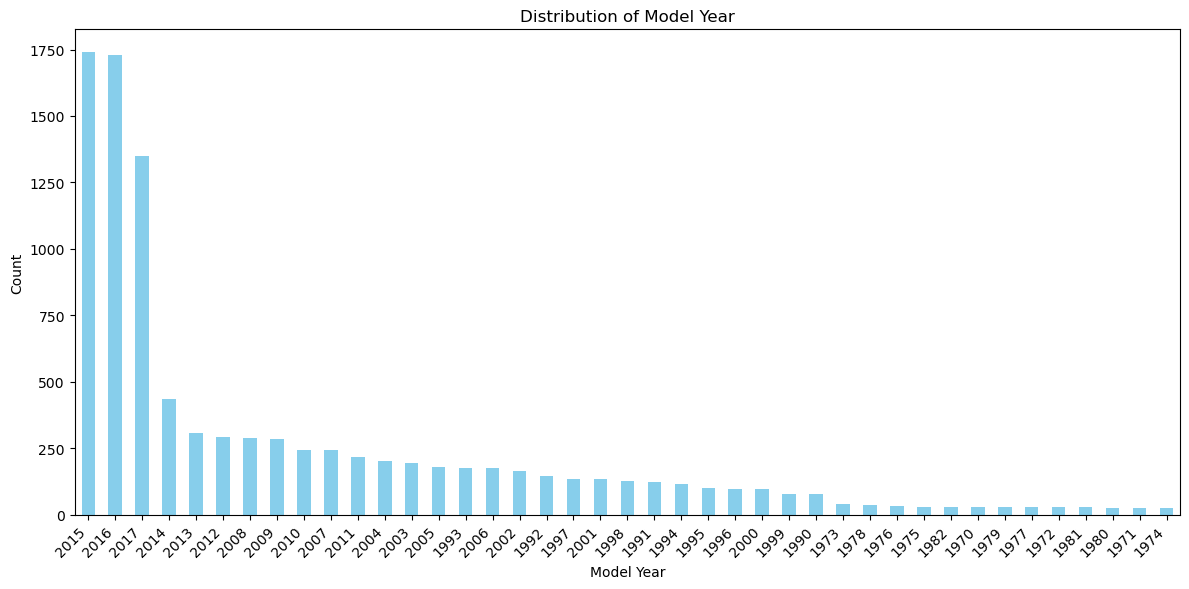

In [32]:
model_year_counts = data_new['model_year'].value_counts()

plt.figure(figsize=(12, 6))
model_year_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Model Year')
plt.xlabel('Model Year')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  

# Show plot
plt.show()

In [4]:
#missing value

data_new.interpolate(method = 'linear', limit=1)

nan_columns = data_new.columns[data_new.isna().any()].tolist()

if nan_columns:
    print("NaN values found in the following columns:")
    print(nan_columns)
else:
    print("No NaN values found in the DataFrame.")

data_new

No NaN values found in the DataFrame.


C:\Users\dzkje\AppData\Local\Temp\ipykernel_4308\3373537816.py:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data_new.interpolate(method = 'linear', limit=1)


,name,mpg,cylinders,horsepower,model_year,origin
0,chevrolet chevelle malibu,18.0,8.0,130.0,1970,usa
1,buick skylark 320,15.0,8.0,165.0,1970,usa
2,plymouth satellite,18.0,8.0,150.0,1970,usa
3,amc rebel sst,16.0,8.0,150.0,1970,usa
4,ford torino,17.0,8.0,140.0,1970,usa
...,...,...,...,...,...,...
9839,Town Car,16.0,8.0,239.0,2011,usa
9840,Town Car,16.0,8.0,239.0,2011,usa
9841,Town Car,16.0,8.0,239.0,2011,usa
9842,Town Car,16.0,8.0,239.0,2011,usa


New data based on feature origin

If value of 'Worth' = 0 then False or not worth it, else 'Worth' = 1 then True or it is worth it

Gaussian Naive Bayes 

Origin based usa

In [5]:
usa_count = data_new['origin'].value_counts().get('usa', 0)
print("Number of occurrences where origin is 'usa':", usa_count)

Number of occurrences where origin is 'usa': 3780


In [68]:
high_mpg_data = data_new[data_new['mpg'] > 100]
print(high_mpg_data)

          name    mpg  cylinders  horsepower  model_year  origin
4615        i3  137.0        0.0       170.0        2015  europe
4616        i3  137.0        0.0       170.0        2016  europe
4617        i3  137.0        0.0       170.0        2017  europe
4618        i3  129.0        0.0       170.0        2017  europe
8054  Spark EV  128.0        0.0       140.0        2014     usa
8055  Spark EV  128.0        0.0       140.0        2014     usa
8056  Spark EV  128.0        0.0       140.0        2015     usa
8057  Spark EV  128.0        0.0       140.0        2015     usa
8058  Spark EV  128.0        0.0       140.0        2016     usa
8059  Spark EV  128.0        0.0       140.0        2016     usa


In [38]:
usa_data1 = data_new[data_new['origin'] == 'usa']

def calculate_worth1(row):
    if row['cylinders'] <= 4 and row['horsepower'] <= 160  and row['horsepower'] > row['mpg'] :
        return 0
    else:
        return 1

usa_data1['worth'] = usa_data1.apply(calculate_worth1, axis=1)
        
X1 = usa_data1[['mpg', 'horsepower']]
y1 = usa_data1['worth']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.4, random_state=42)

gnb = GaussianNB()

gnb.fit(X_train1, y_train1)

y_pred1 = gnb.predict(X_test1)

accuracy1 = accuracy_score(y_test1, y_pred1)
print("Accuracy:", accuracy1)

report = classification_report(y_test1, y_pred1)

print("Classification Report:")
print(report)

Accuracy: 0.953042328042328
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.76      0.83       226
           1       0.96      0.99      0.97      1286

    accuracy                           0.95      1512
   macro avg       0.94      0.87      0.90      1512
weighted avg       0.95      0.95      0.95      1512



C:\Users\dzkje\AppData\Local\Temp\ipykernel_15312\2663078081.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa_data1['worth'] = usa_data1.apply(calculate_worth1, axis=1)


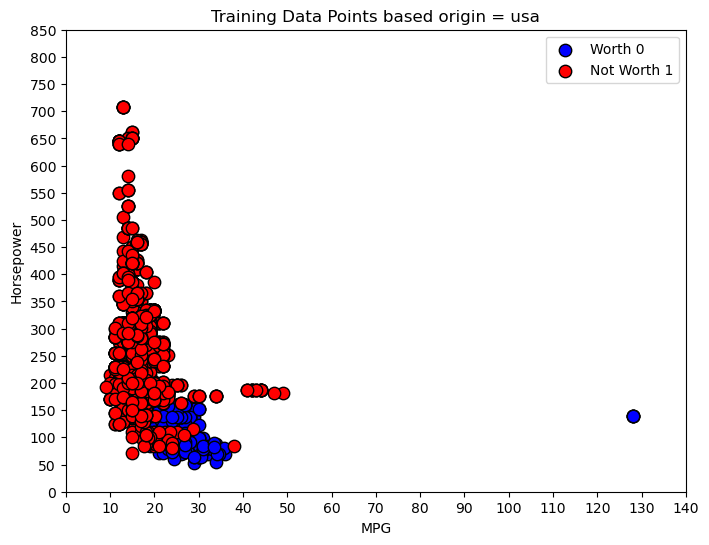

In [73]:
plt.figure(figsize=(8, 6))

plt.scatter(X_train1.loc[y_train1 == 0, 'mpg'], X_train1.loc[y_train1 == 0, 'horsepower'], label='Worth 0', color='blue', edgecolor='k', s=80)
plt.scatter(X_train1.loc[y_train1 == 1, 'mpg'], X_train1.loc[y_train1 == 1, 'horsepower'], label='Not Worth 1', color='red', edgecolor='k', s=80)

plt.xlabel('MPG')
plt.ylabel('Horsepower')
plt.title('Training Data Points based origin = usa')
#plt.colorbar(label='Worth')
plt.xticks(np.arange(0, 150, 10)) 
plt.yticks(np.arange(0, 900, 50))
plt.legend() 
plt.show()

Confusion Matrix

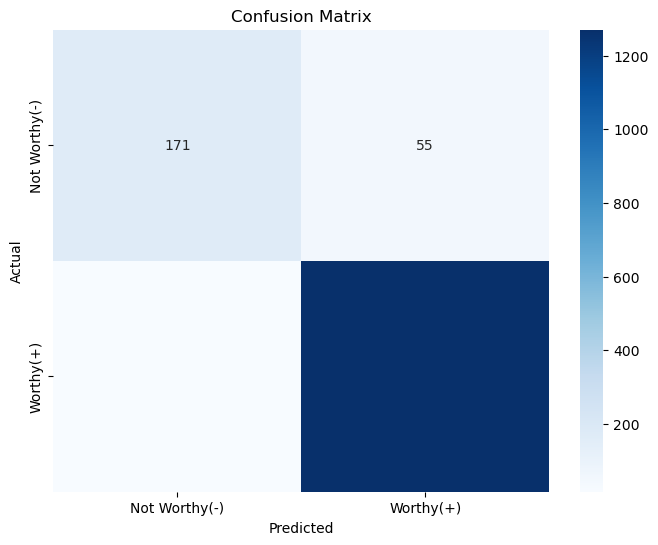

In [41]:
cm = confusion_matrix(y_test1, y_pred1)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', 
            xticklabels=['Not Worthy(-)', 'Worthy(+)'], 
            yticklabels=['Not Worthy(-)', 'Worthy(+)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

ROC Curve (Model Validation)

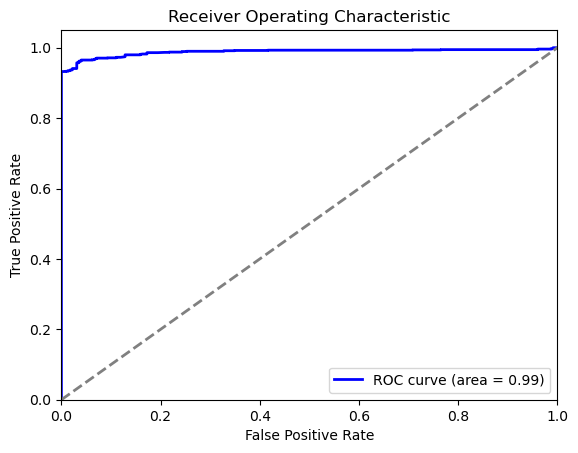

In [35]:
y_probs = gnb.predict_proba(X_test1)[:, 1]

fpr, tpr, _ = roc_curve(y_test1, y_probs)
roc_auc = roc_auc_score(y_test1, y_probs)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

Origin based japan

In [75]:
jpn_data = data_new[data_new['origin'] == 'japan']

def calculate_worth2(row):
    if row['cylinders'] <= 4 and row['horsepower'] < 120 and row['horsepower'] > row['mpg']:
        return 1
    else:
        return 0

jpn_data.loc[:, 'worth'] = jpn_data.apply(calculate_worth2, axis=1)

X2 = jpn_data[['mpg', 'horsepower']]
y2 = jpn_data['worth']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.4, random_state=42)

gnb = GaussianNB()

gnb.fit(X_train2, y_train2)

y_pred2 = gnb.predict(X_test2)

accuracy2 = accuracy_score(y_test2, y_pred2)
print("Accuracy:", accuracy2)

report = classification_report(y_test2, y_pred2)

print("Classification Report:")
print(report)

Accuracy: 0.9656488549618321
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1187
           1       0.87      0.75      0.80       123

    accuracy                           0.97      1310
   macro avg       0.92      0.87      0.89      1310
weighted avg       0.96      0.97      0.96      1310



C:\Users\dzkje\AppData\Local\Temp\ipykernel_15312\1606318137.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jpn_data.loc[:, 'worth'] = jpn_data.apply(calculate_worth2, axis=1)


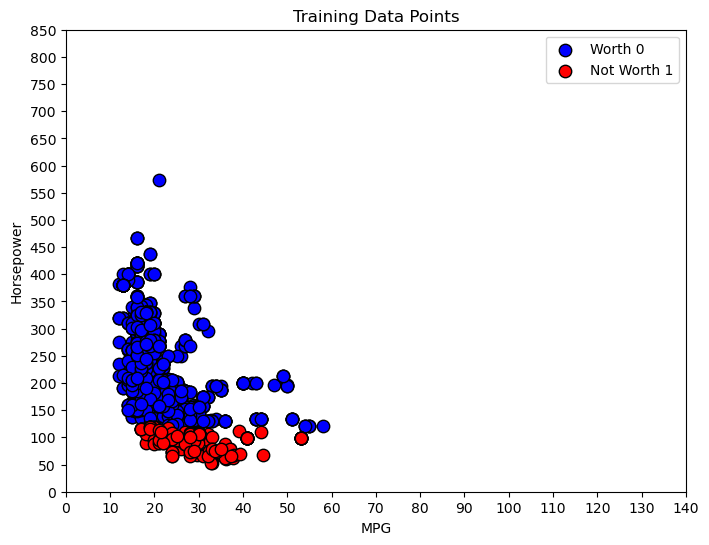

In [76]:
plt.figure(figsize=(8, 6))

plt.scatter(X_train2.loc[y_train2 == 0, 'mpg'], X_train2.loc[y_train2 == 0, 'horsepower'], label='Worth 0', color='blue', edgecolor='k', s=80)
plt.scatter(X_train2.loc[y_train2 == 1, 'mpg'], X_train2.loc[y_train2 == 1, 'horsepower'], label='Not Worth 1', color='red', edgecolor='k', s=80)

plt.xlabel('MPG')
plt.ylabel('Horsepower')
plt.title('Training Data Points')
#plt.colorbar(label='Worth')
plt.xticks(np.arange(0, 150, 10)) 
plt.yticks(np.arange(0, 900, 50))
plt.legend() 
plt.show()

Confusion Matrix

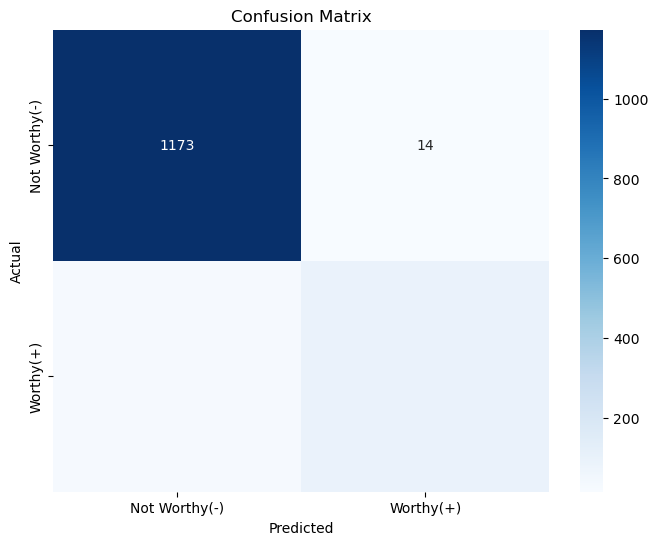

In [50]:
cm = confusion_matrix(y_test2, y_pred2)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', 
            xticklabels=['Not Worthy(-)', 'Worthy(+)'], 
            yticklabels=['Not Worthy(-)', 'Worthy(+)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

ROC (validation)

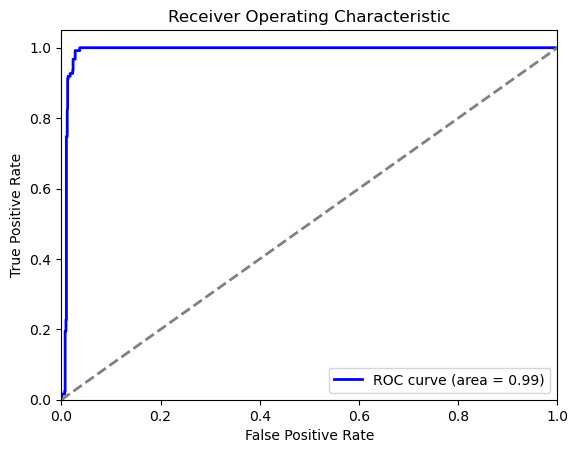

In [42]:
y_probs = gnb.predict_proba(X_test2)[:, 1]

fpr, tpr, _ = roc_curve(y_test2, y_probs)
roc_auc = roc_auc_score(y_test2, y_probs)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

Origin based europe

In [71]:
eu_data = data_new[data_new['origin'] == 'europe']

def calculate_worth3(row):
    if row['cylinders'] < 5 and row['horsepower'] < 140 and row['horsepower'] > row['mpg']:
        return 1
    else:
        return 0

eu_data['worth'] = eu_data.apply(calculate_worth3, axis=1)

X3 = eu_data[['mpg', 'horsepower']]
y3 = eu_data['worth']

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.4, random_state=42)

gnb = GaussianNB()

gnb.fit(X_train3, y_train3)

y_pred3 = gnb.predict(X_test3)

accuracy3 = accuracy_score(y_test3, y_pred3)
print("Accuracy:", accuracy3)

report = classification_report(y_test3, y_pred3)

print("Classification Report:")
print(report)

Accuracy: 0.9561324977618622
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1062
           1       0.62      0.27      0.38        55

    accuracy                           0.96      1117
   macro avg       0.79      0.63      0.68      1117
weighted avg       0.95      0.96      0.95      1117



C:\Users\dzkje\AppData\Local\Temp\ipykernel_15312\1866218574.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eu_data['worth'] = eu_data.apply(calculate_worth3, axis=1)


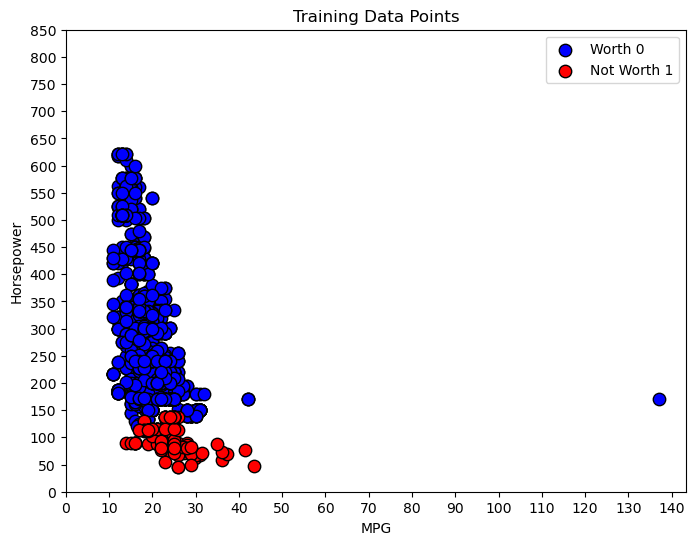

In [74]:
plt.figure(figsize=(8, 6))

plt.scatter(X_train3.loc[y_train3 == 0, 'mpg'], X_train3.loc[y_train3 == 0, 'horsepower'], label='Worth 0', color='blue', edgecolor='k', s=80)
plt.scatter(X_train3.loc[y_train3 == 1, 'mpg'], X_train3.loc[y_train3 == 1, 'horsepower'], label='Not Worth 1', color='red', edgecolor='k', s=80)

plt.xlabel('MPG')
plt.ylabel('Horsepower')
plt.title('Training Data Points')
#plt.colorbar(label='Worth')
plt.xticks(np.arange(0, 150, 10)) 
plt.yticks(np.arange(0, 900, 50))
plt.legend() 
plt.show()

Confusion Matrix

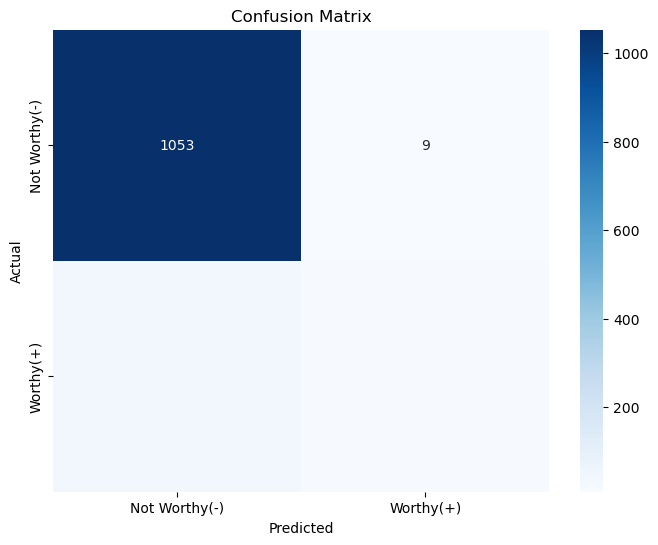

In [52]:
cm = confusion_matrix(y_test3, y_pred3)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', 
            xticklabels=['Not Worthy(-)', 'Worthy(+)'], 
            yticklabels=['Not Worthy(-)', 'Worthy(+)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

ROC (Validation)

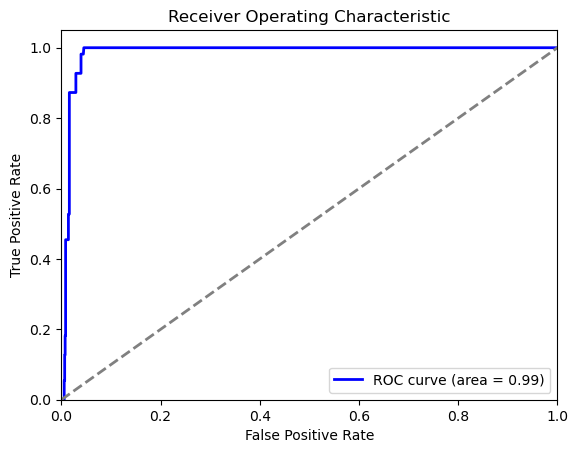

In [53]:
y_probs = gnb.predict_proba(X_test3)[:, 1]

fpr, tpr, _ = roc_curve(y_test3, y_probs)
roc_auc = roc_auc_score(y_test3, y_probs)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [10]:
eu_count = eu_data_new['origin'].value_counts().get('europe', 0)
print("Number of occurrences where origin is 'Europe':", eu_count)


Number of occurrences where origin is 'Europe': 2493


Bernouli based usa

In [58]:
usa_data1 = data_new[data_new['origin'] == 'usa']

def calculate_worth1(row):
    if row['cylinders'] <= 4 and row['horsepower'] <= 160  and row['horsepower'] > row['mpg'] :
        return 0
    else:
        return 1

usa_data1['worth'] = usa_data1.apply(calculate_worth1, axis=1)
        
X1 = usa_data1[['mpg', 'horsepower']]
y1 = usa_data1['worth']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.4, random_state=42)

bnb = BernoulliNB()

bnb.fit(X_train1, y_train1)

y_pred1 = bnb.predict(X_test1)

accuracy1 = accuracy_score(y_test1, y_pred1)
print("Accuracy:", accuracy1)

report = classification_report(y_test1, y_pred1)

print("Classification Report:")
print(report)

Accuracy: 0.8505291005291006
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       226
           1       0.85      1.00      0.92      1286

    accuracy                           0.85      1512
   macro avg       0.43      0.50      0.46      1512
weighted avg       0.72      0.85      0.78      1512



C:\Users\dzkje\AppData\Local\Temp\ipykernel_4308\820594665.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa_data1['worth'] = usa_data1.apply(calculate_worth1, axis=1)
C:\Users\dzkje\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dzkje\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn

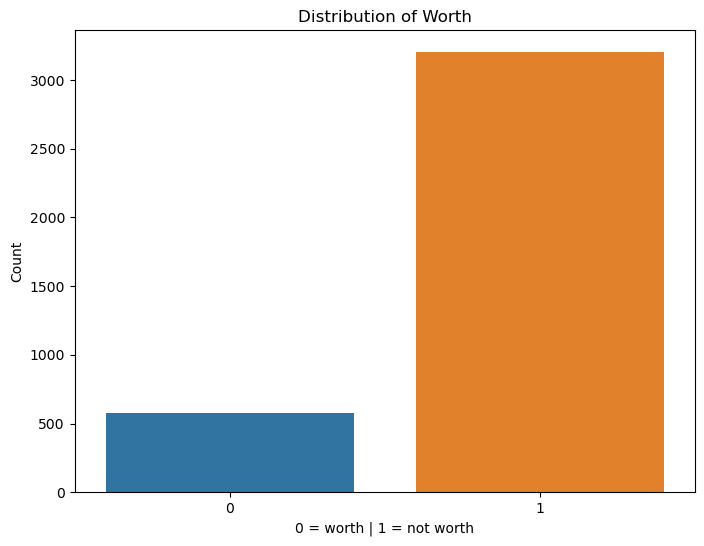

In [36]:
plt.figure(figsize=(8, 6))
sns.countplot(x='worth', data=usa_data1)
plt.xlabel('0 = worth | 1 = not worth')
plt.ylabel('Count')
plt.title('Distribution of Worth')
plt.show()


Bernouli based japan

In [59]:
jpn_data = data_new[data_new['origin'] == 'japan']

def calculate_worth2(row):
    if row['cylinders'] <= 4 and row['horsepower'] < 120 and row['horsepower'] > row['mpg']:
        return 1
    else:
        return 0

jpn_data.loc[:, 'worth'] = jpn_data.apply(calculate_worth2, axis=1)

X2 = jpn_data[['mpg', 'horsepower']]
y2 = jpn_data['worth']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.4, random_state=42)

bnb = BernoulliNB()

bnb.fit(X_train2, y_train2)

y_pred2 = bnb.predict(X_test2)

accuracy2 = accuracy_score(y_test2, y_pred2)
print("Accuracy:", accuracy2)

report = classification_report(y_test2, y_pred2)

print("Classification Report:")
print(report)

C:\Users\dzkje\AppData\Local\Temp\ipykernel_4308\2436726891.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jpn_data.loc[:, 'worth'] = jpn_data.apply(calculate_worth2, axis=1)


Accuracy: 0.9061068702290076
Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1187
           1       0.00      0.00      0.00       123

    accuracy                           0.91      1310
   macro avg       0.45      0.50      0.48      1310
weighted avg       0.82      0.91      0.86      1310



C:\Users\dzkje\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dzkje\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dzkje\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


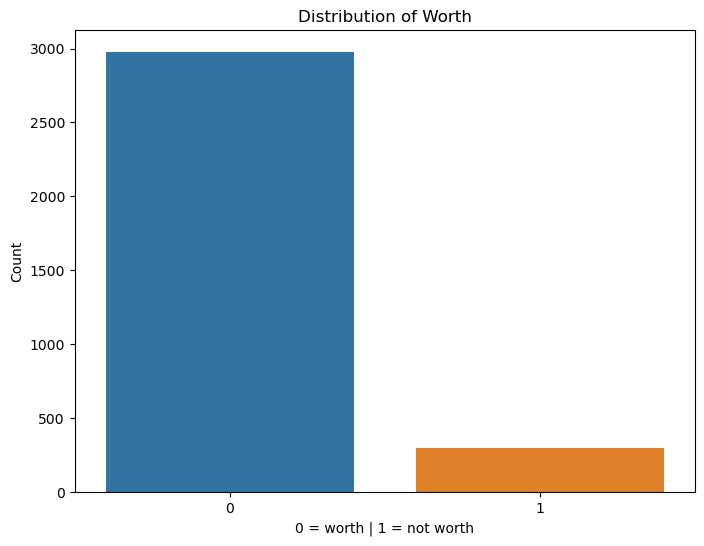

In [38]:
plt.figure(figsize=(8, 6))
sns.countplot(x='worth', data=jpn_data)
plt.xlabel('0 = worth | 1 = not worth')
plt.ylabel('Count')
plt.title('Distribution of Worth')
plt.show()


Bernouli based europe

In [61]:
eu_data = data_new[data_new['origin'] == 'europe']

eu_data['worth'] = eu_data.apply(calculate_worth3, axis=1)

X3 = eu_data[['mpg', 'horsepower']]
y3 = eu_data['worth']

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.4, random_state=42)

bnb = BernoulliNB()

bnb.fit(X_train3, y_train3)

y_pred3 = bnb.predict(X_test3)

accuracy3 = accuracy_score(y_test3, y_pred3)
print("Accuracy:", accuracy3)

report = classification_report(y_test3, y_pred3)

print("Classification Report:")
print(report)

Accuracy: 0.9507609668755596
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1062
           1       0.00      0.00      0.00        55

    accuracy                           0.95      1117
   macro avg       0.48      0.50      0.49      1117
weighted avg       0.90      0.95      0.93      1117



C:\Users\dzkje\AppData\Local\Temp\ipykernel_4308\4247255875.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eu_data['worth'] = eu_data.apply(calculate_worth3, axis=1)
C:\Users\dzkje\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dzkje\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_pr

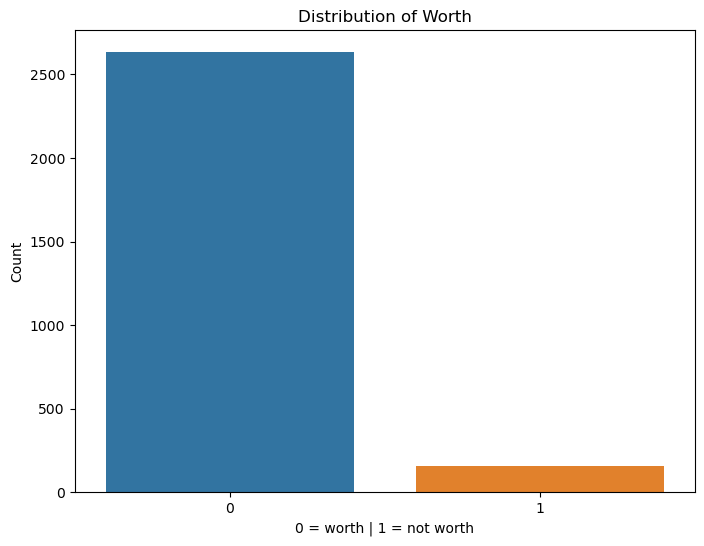

In [40]:
plt.figure(figsize=(8, 6))
sns.countplot(x='worth', data=eu_data)
plt.xlabel('0 = worth | 1 = not worth')
plt.ylabel('Count')
plt.title('Distribution of Worth')
plt.show()


Support Vector Machine

Origin based usa

In [62]:
usa_data1 = data_new[data_new['origin'] == 'usa']

def calculate_worth1(row):
    if row['cylinders'] <= 4 and row['horsepower'] <= 160  and row['horsepower'] > row['mpg'] :
        return 0
    else:
        return 1

usa_data1['worth'] = usa_data1.apply(calculate_worth1, axis=1)
        
X1 = usa_data1[['mpg', 'horsepower']]
y1 = usa_data1['worth']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.4, random_state=42)

svm_classifier = SVC(kernel='linear') 

svm_classifier.fit(X_train1, y_train1)

y_pred1 = svm_classifier.predict(X_test1)

accuracy1 = accuracy_score(y_test1, y_pred1)
print("Accuracy:", accuracy1)

report = classification_report(y_test1, y_pred1)

print("Classification Report:")
print(report)

C:\Users\dzkje\AppData\Local\Temp\ipykernel_4308\1495183482.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa_data1['worth'] = usa_data1.apply(calculate_worth1, axis=1)


Accuracy: 0.9603174603174603
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       226
           1       0.98      0.97      0.98      1286

    accuracy                           0.96      1512
   macro avg       0.91      0.94      0.92      1512
weighted avg       0.96      0.96      0.96      1512



C:\Users\dzkje\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


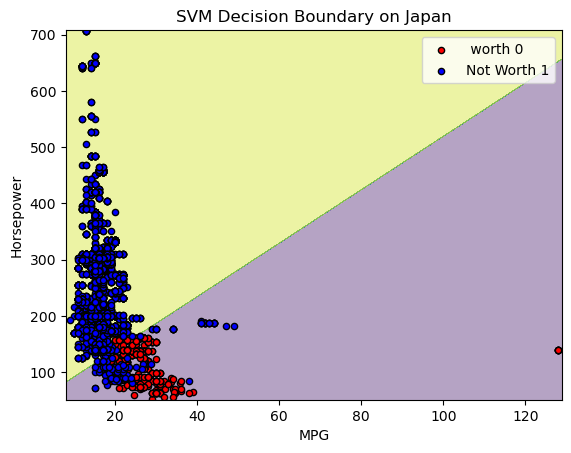

In [42]:
y_pred1 = svm_classifier.predict(X_test1)

x_min, x_max = X1.iloc[:, 0].min() - 1, X1.iloc[:, 0].max() + 1
y_min, y_max = X1.iloc[:, 1].min() - 1, X1.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)

plt.scatter(X1[y1 == 0].iloc[:, 0], X1[y1 == 0].iloc[:, 1], c='red', s=20, edgecolor='k', label=' worth 0')
plt.scatter(X1[y1 == 1].iloc[:, 0], X1[y1 == 1].iloc[:, 1], c='blue', s=20, edgecolor='k', label='Not Worth 1')

plt.xlabel('MPG')
plt.ylabel('Horsepower')
plt.title('SVM Decision Boundary on Japan')
plt.legend()
plt.show()

C:\Users\dzkje\AppData\Local\Temp\ipykernel_4308\1441485220.py:33: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X1[y1 == 0, 0], X1[y1 == 0, 1], Z1_scaled_not_worth, c='blue', cmap=plt.cm.coolwarm, label='Worth 0')
C:\Users\dzkje\AppData\Local\Temp\ipykernel_4308\1441485220.py:34: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X1[y1 == 1, 0], X1[y1 == 1, 1], Z1_scaled_worth, c='green', cmap=plt.cm.coolwarm, label='Not Worth 1')


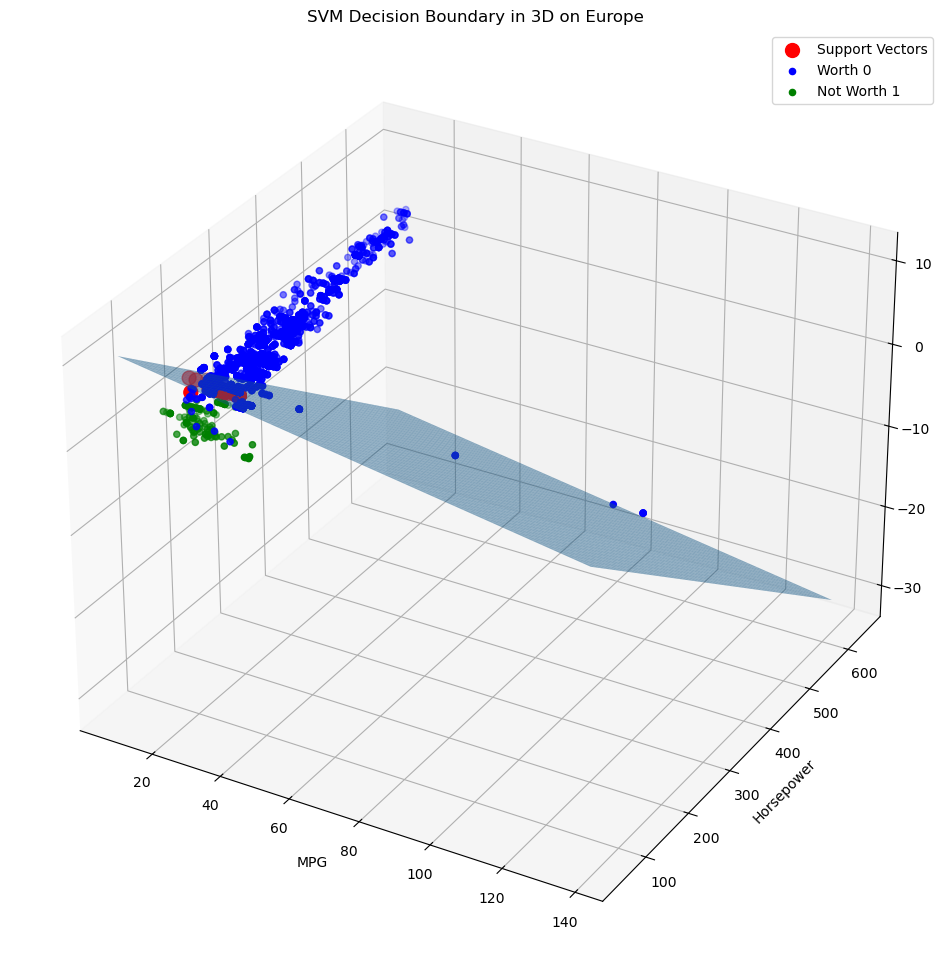

In [44]:
X1 = eu_data[['mpg', 'horsepower','cylinders']].values
y1 = eu_data['worth'].values

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.4, random_state=42)

svm_classifier = SVC(kernel='linear') 

svm_classifier.fit(X_train1, y_train1)

support_vectors = svm_classifier.support_vectors_

fig = plt.figure(figsize=(12, 16))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(support_vectors[:, 0], support_vectors[:, 1], support_vectors[:, 2], s=100, c='red', marker='o', label='Support Vectors')

xx, yy = np.meshgrid(np.linspace(X1[:, 0].min() - 1, X1[:, 0].max() + 1, 50),
                     np.linspace(X1[:, 1].min() - 1, X1[:, 1].max() + 1, 50))
zz = (-svm_classifier.intercept_[0] - svm_classifier.coef_[0, 0] * xx - svm_classifier.coef_[0, 1] * yy) / svm_classifier.coef_[0, 2]
ax.plot_surface(xx, yy, zz, alpha=0.5)

old_min = -30
old_max = 10
new_min = 2
new_max = 8

S = (new_max - new_min) / (old_max - old_min)

Z1_scaled_not_worth = [S * z + new_min for z in X1[y1 == 0, 2]]  # Z values for "Not Worth 0" class
Z1_scaled_worth = [S * z + new_min for z in X1[y1 == 1, 2]]      # Z values for "Worth 1" class

# Plot the data points for each class with scaled Z values
ax.scatter(X1[y1 == 0, 0], X1[y1 == 0, 1], Z1_scaled_not_worth, c='blue', cmap=plt.cm.coolwarm, label='Worth 0')
ax.scatter(X1[y1 == 1, 0], X1[y1 == 1, 1], Z1_scaled_worth, c='green', cmap=plt.cm.coolwarm, label='Not Worth 1')

ax.set_xlabel('MPG')
ax.set_ylabel('Horsepower')
#ax.set_zlabel('Cylinders')
ax.set_title('SVM Decision Boundary in 3D on Europe')

plt.legend()
plt.show()

Origin based japan

In [63]:
jpn_data = data_new[data_new['origin'] == 'japan']

def calculate_worth2(row):
    if row['cylinders'] <= 4 and row['horsepower'] < 120 and row['horsepower'] > row['mpg']:
        return 1
    else:
        return 0

jpn_data.loc[:, 'worth'] = jpn_data.apply(calculate_worth2, axis=1)

X2 = jpn_data[['mpg', 'horsepower']]
y2 = jpn_data['worth']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.4, random_state=42)

svm_classifier = SVC(kernel='linear') 

svm_classifier.fit(X_train2, y_train2)

y_pred2 = svm_classifier.predict(X_test2)

accuracy2 = accuracy_score(y_test2, y_pred2)
print("Accuracy:", accuracy2)

report = classification_report(y_test2, y_pred2)

print("Classification Report:")
print(report)

Accuracy: 0.9977099236641221
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1187
           1       0.98      1.00      0.99       123

    accuracy                           1.00      1310
   macro avg       0.99      1.00      0.99      1310
weighted avg       1.00      1.00      1.00      1310



C:\Users\dzkje\AppData\Local\Temp\ipykernel_4308\3242020188.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jpn_data.loc[:, 'worth'] = jpn_data.apply(calculate_worth2, axis=1)


C:\Users\dzkje\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


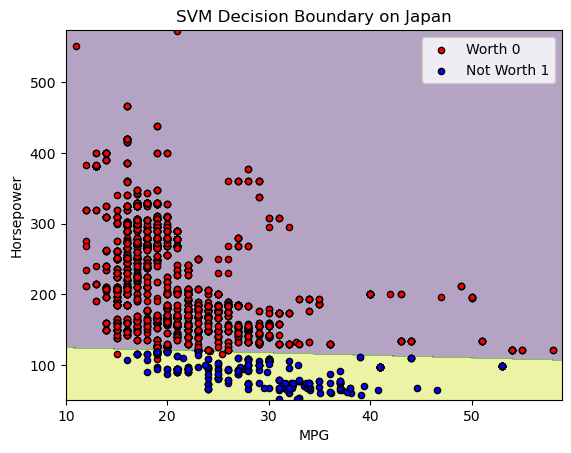

In [46]:
y_pred2 = svm_classifier.predict(X_test2)

x_min, x_max = X2.iloc[:, 0].min() - 1, X2.iloc[:, 0].max() + 1
y_min, y_max = X2.iloc[:, 1].min() - 1, X2.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)

plt.scatter(X2[y2 == 0].iloc[:, 0], X2[y2 == 0].iloc[:, 1], c='red', s=20, edgecolor='k', label='Worth 0')
plt.scatter(X2[y2 == 1].iloc[:, 0], X2[y2 == 1].iloc[:, 1], c='blue', s=20, edgecolor='k', label='Not Worth 1')

plt.xlabel('MPG')
plt.ylabel('Horsepower')
plt.title('SVM Decision Boundary on Japan')
plt.legend()
plt.show()

C:\Users\dzkje\AppData\Local\Temp\ipykernel_4308\3755802363.py:22: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X2[y2 == 0][:, 0], X2[y2 == 0][:, 1], X2[y2 == 0][:, 2], c='blue', cmap=plt.cm.coolwarm, label='Worth 0')
C:\Users\dzkje\AppData\Local\Temp\ipykernel_4308\3755802363.py:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X2[y2 == 1][:, 0], X2[y2 == 1][:, 1], X2[y2 == 1][:, 2], c='green', cmap=plt.cm.coolwarm, label='Not Worth 1')


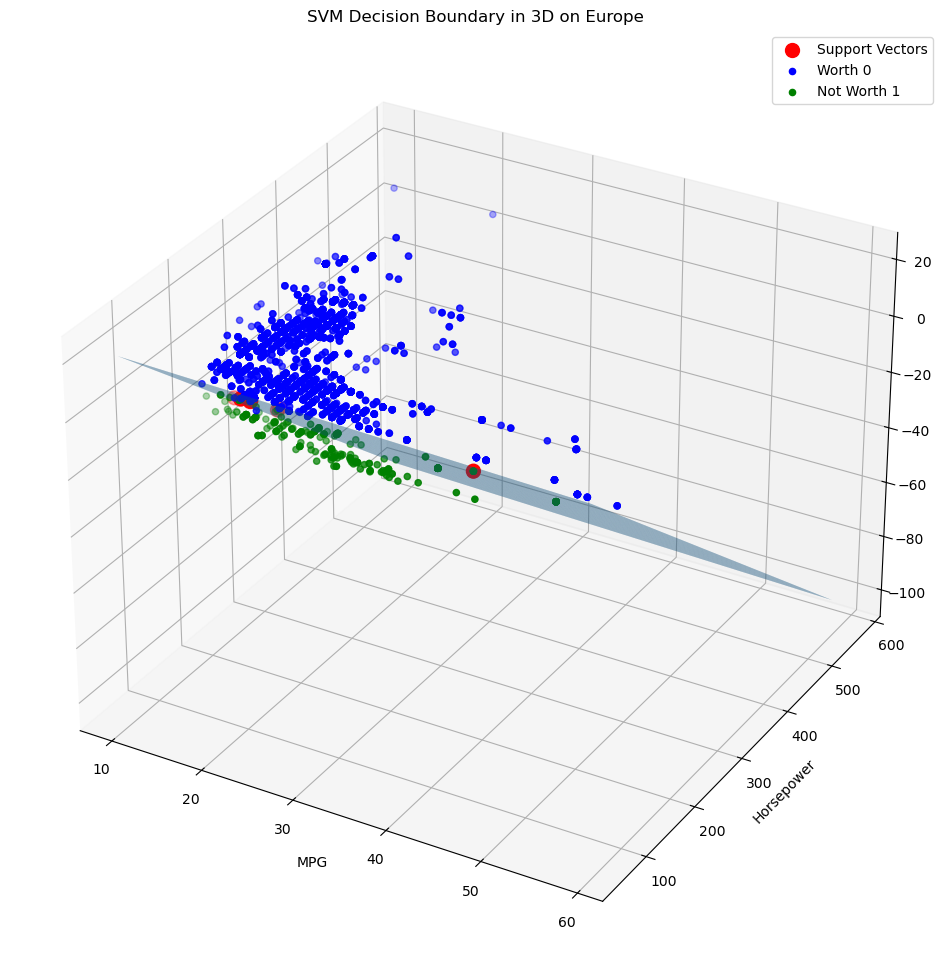

In [52]:
X2 = jpn_data[['mpg', 'horsepower','cylinders']].values
y2 = jpn_data['worth'].values

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.4, random_state=42)

svm_classifier = SVC(kernel='linear') 

svm_classifier.fit(X_train2, y_train2)

support_vectors = svm_classifier.support_vectors_

fig = plt.figure(figsize=(12, 16))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(support_vectors[:, 0], support_vectors[:, 1], support_vectors[:, 2], s=100, c='red', marker='o', label='Support Vectors')

xx2, yy2 = np.meshgrid(np.linspace(X2[:, 0].min() - 1, X2[:, 0].max() + 1, 50),
                     np.linspace(X2[:, 1].min() - 1, X2[:, 1].max() + 1, 50))
zz2 = (-svm_classifier.intercept_[0] - svm_classifier.coef_[0, 0] * xx2 - svm_classifier.coef_[0, 1] * yy2) / svm_classifier.coef_[0, 2]
ax.plot_surface(xx2, yy2, zz2, alpha=0.5)

ax.scatter(X2[y2 == 0][:, 0], X2[y2 == 0][:, 1], X2[y2 == 0][:, 2], c='blue', cmap=plt.cm.coolwarm, label='Worth 0')
ax.scatter(X2[y2 == 1][:, 0], X2[y2 == 1][:, 1], X2[y2 == 1][:, 2], c='green', cmap=plt.cm.coolwarm, label='Not Worth 1')

ax.set_xlabel('MPG')
ax.set_ylabel('Horsepower')
#ax.set_zlabel('Cylinders')
ax.set_title('SVM Decision Boundary in 3D on Europe')

plt.legend()
plt.show()

Origin based europe


In [64]:
eu_data = data_new[data_new['origin'] == 'europe']

def calculate_worth3(row):
    if row['cylinders'] < 5 and row['horsepower'] < 140 and row['horsepower'] > row['mpg']:
        return 1
    else:
        return 0

eu_data['worth'] = eu_data.apply(calculate_worth3, axis=1)

X3 = eu_data[['mpg', 'horsepower']]
y3 = eu_data['worth']

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.4, random_state=42)

svm_classifier = SVC(kernel='linear') 

svm_classifier.fit(X_train3, y_train3)

y_pred3 = svm_classifier.predict(X_test3)

accuracy3 = accuracy_score(y_test3, y_pred3)
print("Accuracy:", accuracy3)

report = classification_report(y_test3, y_pred3)

print("Classification Report:")
print(report)

Accuracy: 0.9865711727842436
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1062
           1       0.86      0.87      0.86        55

    accuracy                           0.99      1117
   macro avg       0.93      0.93      0.93      1117
weighted avg       0.99      0.99      0.99      1117



C:\Users\dzkje\AppData\Local\Temp\ipykernel_4308\926252506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eu_data['worth'] = eu_data.apply(calculate_worth3, axis=1)


C:\Users\dzkje\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


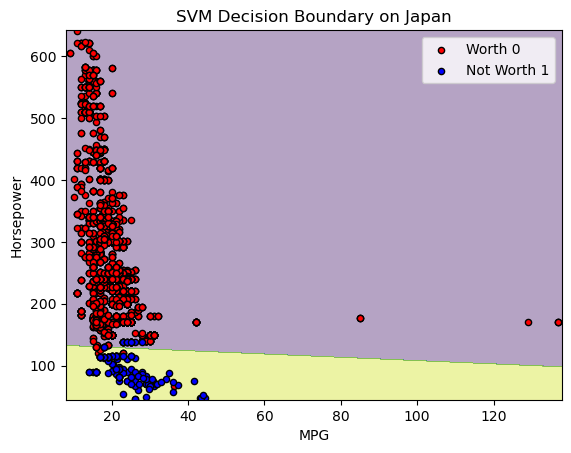

In [49]:
x_min, x_max = X3.iloc[:, 0].min() - 1, X3.iloc[:, 0].max() + 1
y_min, y_max = X3.iloc[:, 1].min() - 1, X3.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)

plt.scatter(X3[y3 == 0].iloc[:, 0], X3[y3 == 0].iloc[:, 1], c='red', s=20, edgecolor='k', label='Worth 0')
plt.scatter(X3[y3 == 1].iloc[:, 0], X3[y3 == 1].iloc[:, 1], c='blue', s=20, edgecolor='k', label='Not Worth 1')

plt.xlabel('MPG')
plt.ylabel('Horsepower')
plt.title('SVM Decision Boundary on Japan')
plt.legend()
plt.show()

C:\Users\dzkje\AppData\Local\Temp\ipykernel_4308\3312679243.py:22: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X3[y3 == 0][:, 0], X3[y3 == 0][:, 1], X3[y3 == 0][:, 2], c='blue', cmap=plt.cm.coolwarm, label='Worth 0')
C:\Users\dzkje\AppData\Local\Temp\ipykernel_4308\3312679243.py:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X3[y3 == 1][:, 0], X3[y3 == 1][:, 1], X3[y3 == 1][:, 2], c='green', cmap=plt.cm.coolwarm, label='Not Worth 1')


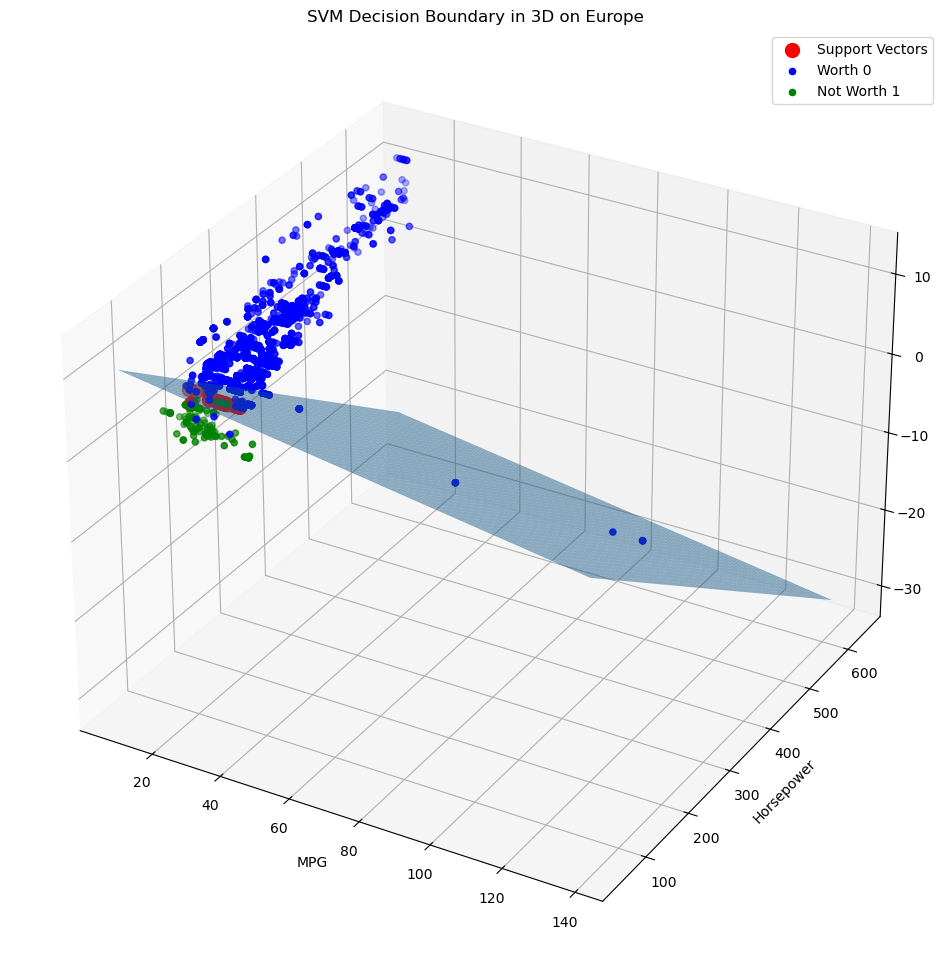

In [51]:
X3 = eu_data[['mpg', 'horsepower','cylinders']].values
y3 = eu_data['worth'].values

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.4, random_state=42)

svm_classifier = SVC(kernel='linear') 

svm_classifier.fit(X_train3, y_train3)

support_vectors = svm_classifier.support_vectors_

fig = plt.figure(figsize=(12, 16))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(support_vectors[:, 0], support_vectors[:, 1], support_vectors[:, 2], s=100, c='red', marker='o', label='Support Vectors')

xx3, yy3 = np.meshgrid(np.linspace(X3[:, 0].min() - 1, X3[:, 0].max() + 1, 50),
                     np.linspace(X3[:, 1].min() - 1, X3[:, 1].max() + 1, 50))
zz3 = (-svm_classifier.intercept_[0] - svm_classifier.coef_[0, 0] * xx3 - svm_classifier.coef_[0, 1] * yy3) / svm_classifier.coef_[0, 2]
ax.plot_surface(xx3, yy3, zz3, alpha=0.5)

ax.scatter(X3[y3 == 0][:, 0], X3[y3 == 0][:, 1], X3[y3 == 0][:, 2], c='blue', cmap=plt.cm.coolwarm, label='Worth 0')
ax.scatter(X3[y3 == 1][:, 0], X3[y3 == 1][:, 1], X3[y3 == 1][:, 2], c='green', cmap=plt.cm.coolwarm, label='Not Worth 1')

ax.set_xlabel('MPG')
ax.set_ylabel('Horsepower')
#ax.set_zlabel('Cylinders')
ax.set_title('SVM Decision Boundary in 3D on Europe')

plt.legend()
plt.show()

Cross - Validation

origin based usa

In [11]:
data_new = pd.read_csv('Automobile_Final_2.csv')

usa_data = data_new[data_new['origin'] == 'usa']

def calculate_worth1(row):
    if row['cylinders'] <= 4 and row['horsepower'] <= 160  and row['horsepower'] > row['mpg'] :
        return 0
    else:
        return 1

usa_data['worth'] = usa_data.apply(calculate_worth1, axis=1)

X = usa_data[['mpg', 'horsepower','cylinders']]
y = usa_data['worth']

model = SVC()

n_splits = 10
stratified_cv = StratifiedKFold(n_splits=n_splits)

cv_scores = cross_val_score(model, X, y, cv=stratified_cv)

print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())

C:\Users\dzkje\AppData\Local\Temp\ipykernel_4308\3064402336.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa_data['worth'] = usa_data.apply(calculate_worth1, axis=1)


Cross-validation scores: [0.65079365 1.         0.95238095 0.96560847 0.94179894 1.
 1.         0.87037037 0.98677249 0.96296296]
Mean CV score: 0.9330687830687833


Origin based japan

In [13]:
jpn_data = data_new[data_new['origin'] == 'japan']

def calculate_worth2(row):
    if row['cylinders'] <= 4 and row['horsepower'] < 120 and row['horsepower'] > row['mpg']:
        return 1
    else:
        return 0

jpn_data.loc[:, 'worth'] = jpn_data.apply(calculate_worth2, axis=1)

X2 = jpn_data[['mpg', 'horsepower','cylinders']]
y2 = jpn_data['worth']

model = SVC()

n_splits = 10
stratified_cv = StratifiedKFold(n_splits=n_splits)

cv_scores = cross_val_score(model, X2, y2, cv=stratified_cv)

print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())

C:\Users\dzkje\AppData\Local\Temp\ipykernel_4308\1422600838.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jpn_data.loc[:, 'worth'] = jpn_data.apply(calculate_worth2, axis=1)


Cross-validation scores: [0.99390244 1.         0.99695122 0.96636086 1.         0.97247706
 1.         1.         1.         0.94801223]
Mean CV score: 0.9877703811441784


Origin based europe

In [14]:
eu_data = data_new[data_new['origin'] == 'usa']

def calculate_worth3(row):
    if row['cylinders'] < 5 and row['horsepower'] < 140 and row['horsepower'] > row['mpg']:
        return 1
    else:
        return 0

eu_data['worth'] = eu_data.apply(calculate_worth3, axis=1)

X3 = eu_data[['mpg', 'horsepower']]
y3 = eu_data['worth']

model = SVC()

n_splits = 10
stratified_cv = StratifiedKFold(n_splits=n_splits)

cv_scores = cross_val_score(model, X3, y3, cv=stratified_cv)

print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())

C:\Users\dzkje\AppData\Local\Temp\ipykernel_4308\1179014770.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eu_data['worth'] = eu_data.apply(calculate_worth3, axis=1)


Cross-validation scores: [0.76719577 1.         0.98148148 0.99206349 0.93386243 0.9021164
 0.94179894 0.93650794 0.97883598 0.99470899]
Mean CV score: 0.9428571428571428
